# 🍿 Final project - The Movie Database

For this project, we have targeted movies to analyze them and predict:
- A budget a movie has to allocate to get high ratings and revenues (Numerical data)
- The genre(s) of a movie by providing its overview

Imports we will be using for the project

In [3]:
import requests
import json
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
API_KEY=""

## How did we collect the data?
> The Movie Database (TMDB) is a public API which provides lot of datas about movies, series and TV Show including descriptions, title, ratings, etc ...

We need to get the IDs of the movies we'd like to collect. TMDB uses a system of pages, where each page contains a list of movies

In [ ]:
def get_full_array(page):
    try:
        url = f"https://api.themoviedb.org/3/discover/movie?page={page}"
        headers = {
            "accept": "application/json",
            "Authorization": f"Bearer {API_KEY}"
        }

        response = requests.get(url, headers=headers).text
        data = json.loads(response)
        return [movie['id'] for movie in data['results']]
    except Exception as e:
        return []

IDs = []
for page in tqdm(range(1, 700)):
    IDs += get_full_array(page)



100%|██████████| 699/699 [00:44<00:00, 15.70it/s]


In [ ]:
IDs # List of movie IDs

[552524,
 1233413,
 950387,
 757725,
 870028,
 1257960,
 1197306,
 1411773,
 574475,
 575265,
 299536,
 315635,
 436969,
 1284120,
 284054,
 321612,
 1241436,
 568770,
 1232546,
 822119,
 376867,
 11544,
 297762,
 1241894,
 1199974,
 447273,
 1397832,
 1417059,
 293167,
 541671,
 977294,
 181808,
 1232933,
 464052,
 497698,
 1403735,
 299534,
 986056,
 1241982,
 567609,
 567609,
 680,
 324544,
 339846,
 1233069,
 302946,
 299537,
 1245165,
 897160,
 1087192,
 1144430,
 1011477,
 676685,
 896536,
 1098006,
 1001414,
 1064213,
 320288,
 668489,
 1165642,
 319,
 1297028,
 1010818,
 1480799,
 1094473,
 1087192,
 831973,
 939243,
 1040159,
 429,
 19971,
 762509,
 20760,
 715287,
 7451,
 1010581,
 912649,
 667216,
 793387,
 1448938,
 1195506,
 1225915,
 519182,
 533535,
 1124620,
 575264,
 968171,
 1092073,
 950396,
 1377424,
 1112466,
 1103857,
 1359977,
 933260,
 1153714,
 1414048,
 1022789,
 345940,
 9532,
 1318856,
 1126166,
 1184918,
 811941,
 1092899,
 539972,
 883954,
 383498,
 115659

Since we have collected the movies's ID, we can now get the detail of each one

In [115]:
data = []
for id in tqdm(range(len(IDs))):
    id = IDs[id]
    url = f"https://api.themoviedb.org/3/movie/{id}"
    headers = {
        "accept": "application/json",
        "Authorization": f"Bearer {API_KEY}"
    }
    response = requests.get(url, headers=headers).text
    movie = json.loads(response)
    data.append(movie)

100%|██████████| 10000/10000 [22:13<00:00,  7.50it/s]


We convert the array into `Pandas` dataframe

In [ ]:
df = pd.DataFrame(data)
pd.set_option('display.max_columns', None) # To display all columns
df.to_pickle("all_data.pkl") # Save DataFrame to a pickle file (To directly use the DataFrame later, instead of re-fetching)
df

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,origin_country,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,/7Zx3wDG5bBtcfk8lcnCWDOLM4Y4.jpg,None,100000000,"[{'id': 10751, 'name': 'Family'}, {'id': 35, '...",https://movies.disney.com/lilo-and-stitch-2025,552524,tt11655566,[US],en,Lilo & Stitch,The wildly funny and touching story of a lonel...,554.7778,/tUae3mefrDVTgm5mRzqWnZK6fOP.jpg,"[{'id': 2, 'logo_path': '/wdrCwmRnLFJhEoH8GSfy...","[{'iso_3166_1': 'US', 'name': 'United States o...",2025-05-17,632673317,108,"[{'english_name': 'Spanish', 'iso_639_1': 'es'...",Released,Hold on to your coconuts.,Lilo & Stitch,False,7.100,500
1,False,/nAxGnGHOsfzufThz20zgmRwKur3.jpg,"{'id': 1489663, 'name': 'Sinners Collection', ...",90000000,"[{'id': 27, 'name': 'Horror'}, {'id': 28, 'nam...",https://www.sinnersmovie.com,1233413,tt31193180,[US],en,Sinners,"Trying to leave their troubled lives behind, t...",499.7936,/yqsCU5XOP2mkbFamzAqbqntmfav.jpg,"[{'id': 174, 'logo_path': '/zhD3hhtKB5qyv7ZeL4...","[{'iso_3166_1': 'US', 'name': 'United States o...",2025-04-16,352221894,138,"[{'english_name': 'Mandarin', 'iso_639_1': 'zh...",Released,Dance with the devil.,Sinners,False,7.500,1162
2,False,/2Nti3gYAX513wvhp8IiLL6ZDyOm.jpg,"{'id': 1461530, 'name': 'The Minecraft Movie C...",150000000,"[{'id': 10751, 'name': 'Family'}, {'id': 35, '...",https://www.minecraft-movie.com,950387,tt3566834,[US],en,A Minecraft Movie,Four misfits find themselves struggling with o...,325.3314,/yFHHfHcUgGAxziP1C3lLt0q2T4s.jpg,"[{'id': 174, 'logo_path': '/zhD3hhtKB5qyv7ZeL4...","[{'iso_3166_1': 'SE', 'name': 'Sweden'}, {'iso...",2025-03-31,948128918,101,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Be there and be square.,A Minecraft Movie,False,6.502,1674
3,False,/v67tbCB03CMcJRWit8CS7JdJp6.jpg,None,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",https://www.shadowforce.movie,757725,tt11092020,[US],en,Shadow Force,Kyrah and Isaac were once the leaders of a mul...,335.1621,/uX6FaNE86a4Xnf1mFFEryvjqB1D.jpg,"[{'id': 1632, 'logo_path': '/cisLn1YAUuptXVBa0...","[{'iso_3166_1': 'US', 'name': 'United States o...",2025-05-01,4307562,103,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Family over everything.,Shadow Force,False,6.315,46
4,False,/yBDvgpyynDsbMyK21FoQu1c2wYR.jpg,"{'id': 870339, 'name': 'The Accountant Collect...",80000000,"[{'id': 80, 'name': 'Crime'}, {'id': 53, 'name...",https://www.amazon.com/salp/theaccountant2?hhf,870028,tt7068946,[US],en,The Accountant²,"When an old acquaintance is murdered, Wolff is...",550.6126,/kMDUS7VmFhb2coRfVBoGLR8ADBt.jpg,"[{'id': 187968, 'logo_path': '/xdVAEg1biNrQw5n...","[{'iso_3166_1': 'US', 'name': 'United States o...",2025-04-23,101449750,133,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Do you like puzzles?,The Accountant²,False,7.183,320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,/1MFURVRRsZCap7yG6CPxLbXFFMC.jpg,"{'id': 680712, 'name': 'L♡DK コレクション', 'poster_...",0,"[{'id': 10749, 'name': 'Romance'}]",,578672,tt9105026,[JP],ja,L♡DK ひとつ屋根の下、「スキ」がふたつ。,Aoi Nishimori and Shūsei Kugayama are in love ...,2.5352,/8L66hJyXptS9XBt5b4O7WkZuwYj.jpg,"[{'id': 133840, 'logo_path': None, 'name': 'Vi...","[{'iso_3166_1': 'JP', 'name': 'Japan'}]",2019-03-21,0,107,"[{'english_name': 'Japanese', 'iso_639_1': 'ja...",Released,,L♡DK: Two Loves Under One Roof,False,5.700,34
9996,False,/cgmGPmyeShz9zM9GQM5EEgMutnd.jpg,None,5500000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",https://tickets.greed-film.com/,567598,tt8972256,"[GB, US]",en,Greed,A retail billionaire's 60th birthday party is ...,2.3960,/mZPmDFlVp1BSGQD4QCKHOwbXLfv.jpg,"[{'id': 6705, 'logo_path': '/iNB1FCwT4XjO6wkN3...","[{'iso_3166_1': 'GB', 'name': 'United Kingd

In case we have already fetched the data, we can load the dataframe using this command

In [88]:
df = pd.read_pickle("all_data.pkl")

Since the project is based on French datas, we filter the movies by their `original_language` attribute

In [89]:
copy_df = df.copy()
fr_data = copy_df[copy_df['original_language'] == "fr"]
fr_data

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,origin_country,original_language,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
50,False,/4A5HH9HkCPqAwyYL6CnA0mxbYjn.jpg,"{'id': 1002775, 'name': 'Lost Bullet Collectio...",0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",https://www.netflix.com/title/81701729,1144430,tt29768333,[FR],fr,...,2025-05-06,0,111,"[{'english_name': 'French', 'iso_639_1': 'fr',...",Released,,Last Bullet,False,6.648,165
64,False,/bIh56F8e5EaZ3r2nD1hXAOisItZ.jpg,None,0,"[{'id': 12, 'name': 'Adventure'}, {'id': 10751...",https://www.gedeonmediagroup.com/en/production...,1094473,tt32373637,[FR],fr,...,2024-10-16,1419154,77,"[{'english_name': 'French', 'iso_639_1': 'fr',...",Released,,Bambi: A Life in the Woods,False,6.042,24
90,False,/lS49jyUZg9xHfelHMsmL3o3H6rq.jpg,None,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 27, 'nam...",,1112466,tt27721737,[FR],fr,...,2024-11-15,0,105,"[{'english_name': 'French', 'iso_639_1': 'fr',...",Released,,The Balconettes,False,6.438,56
99,False,/jzo95EcgXHcVrJQFDqoLSf3TJSF.jpg,None,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",,1318856,tt36462054,[FR],fr,...,2025-05-30,0,81,"[{'english_name': 'French', 'iso_639_1': 'fr',...",Released,,The Neverending Wedding,False,4.500,17
111,False,/1AWjIUgbZYaKbwUH5qoJaKCcRkf.jpg,None,0,"[{'id': 99, 'name': 'Documentary'}]",https://www.unity-house.co/van-gogh-by-vincent,1471014,tt36364552,[US],fr,...,2025-03-26,0,46,[],Released,,Van Gogh by Vincent,False,5.941,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9796,False,/uLg9t6c34soxT4UAebbL3Cnlbl5.jpg,None,25000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",,77459,tt0961097,[FR],fr,...,2011-10-12,26611650,90,"[{'english_name': 'French', 'iso_639_1': 'fr',...",Released,You can find love anywhere… even in insects,A Monster in Paris,False,6.900,1281
9813,False,/cHpBJ6EhBj2ZVCvMIsd8RJuoIjU.jpg,None,5133623,"[{'id': 35, 'name': 'Comedy'}]",,761,tt0074103,[FR],fr,...,1976-10-27,0,104,"[{'english_name': 'French', 'iso_639_1': 'fr',...",Released,,The Wing or the Thigh?,False,7.213,902
9899,False,/8Df8Wsstu76Wr8cTPfNHrSveVe6.jpg,None,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",,869617,tt14700948,[FR],fr,...,2021-09-29,0,88,"[{'english_name': 'French', 'iso_639_1': 'fr',...",Released,,Friendzone,False,5.878,266
9918,False,/b6UXXuRQL3teEMVKTyae5hTq8ke.jpg,None,0,"[{'id': 35, 'name': 'Comedy'}]",,671043,tt13079150,[FR],fr,...,2021-09-15,0,100,"[{'english_name': 'French', 'iso_639_1': 'fr',...",Released,,Spoiled Brats,False,6.035,569


Let's show the plots related to the collected data

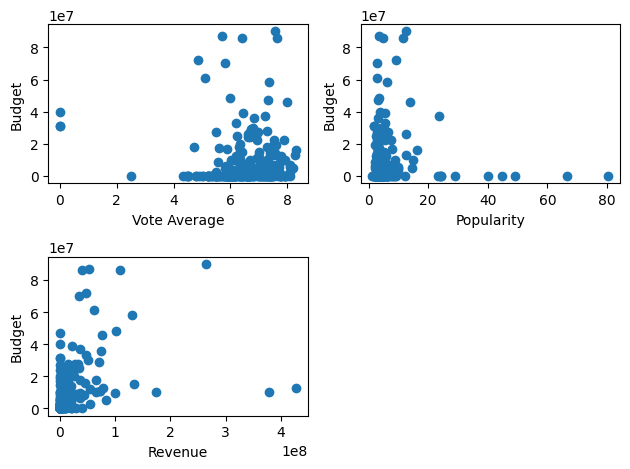

In [90]:
fig, ax = plt.subplots(2,2)

ax[0][0].scatter(fr_data['vote_average'], fr_data['budget'])
ax[0][0].set_xlabel('Vote Average')
ax[0][0].set_ylabel('Budget')

ax[0][1].scatter(fr_data['popularity'], fr_data['budget'])
ax[0][1].set_xlabel('Popularity')
ax[0][1].set_ylabel('Budget')

ax[1][0].scatter(fr_data['revenue'], fr_data['budget'])
ax[1][0].set_xlabel('Revenue')
ax[1][0].set_ylabel('Budget')

ax[1][1].axis('off')

plt.xscale('log')
plt.yscale('log')
plt.tight_layout()
plt.show()

For the numerical values, we are going to use a Logistic Regression

In [ ]:
filtered_df = fr_data[(fr_data['revenue'] > 0) & (fr_data['budget'] > 0)] # Some movies don't have revenue or budget data
numerical_df = filtered_df[["budget", "vote_average", "revenue", "popularity"]]

scaler = StandardScaler()
df_standardized_numerical = pd.DataFrame(scaler.fit_transform(numerical_df), columns=numerical_df.columns) # Standardizing the numerical features

X = df_standardized_numerical[['revenue', 'vote_average', 'popularity']]
y = df_standardized_numerical['budget']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 1.3063376231622326
R² Score: 0.2522665155631384


For the textual values, we have analyzed it is a multi-labelling problem which means that a movie's overview can belongs to several `genres`

In [93]:
df_text = fr_data[['overview', 'genres']]
df_text['genres'] = df_text['genres'].apply(lambda x: ','.join([i['name'] for i in x]))
df_text

/var/folders/jr/7brkgcj57r31tplt49j2t7kc0000gn/T/ipykernel_79462/1547091742.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_text['genres'] = df_text['genres'].apply(lambda x: ','.join([i['name'] for i in x]))


,overview,genres
50,Car genius Lino returns to conclude his vendet...,"Action,Crime,Thriller,Drama"
64,"The life of Bambi, a male roe deer, from his b...","Adventure,Family,Documentary"
90,As a heat wave brings a Marseille neighbourhoo...,"Comedy,Horror,Fantasy"
99,When carefree Paul and reluctant maid of honor...,"Comedy,Romance,Fantasy"
111,"In a career that lasted only ten years, Vincen...",Documentary
...,...,...
9796,"Paris, 1910. Emile, a shy movie projectionist,...","Adventure,Animation,Comedy,Family,Fantasy"
9813,"Charles Duchemin, a well-known gourmet and pub...",Comedy
9899,Hopeful romantic Thibault believes his luck co...,"Romance,Comedy"
9918,The billionaire is tired of the whims of his o...,Comedy


For the classification, the model needs all the target possibilities

In [94]:
all_genres = set()
for genres in df_text['genres']:
    all_genres.update(genres.split(','))
all_genres = sorted(list(all_genres))
all_genres

['',
 'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War']

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split

mlb = MultiLabelBinarizer(classes=all_genres)
df_text['genres_list'] = df_text['genres'].apply(lambda x: x.split(','))
y = mlb.fit_transform(df_text['genres_list']) # We embed the target

X_train, X_test, y_train, y_test = train_test_split(
    df_text['overview'],
    y,
    test_size=0.2,
    random_state=42
)


/var/folders/jr/7brkgcj57r31tplt49j2t7kc0000gn/T/ipykernel_79462/824646679.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_text['genres_list'] = df_text['genres'].apply(lambda x: x.split(','))


In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_text = vectorizer.fit_transform(X_train)

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

model = OneVsRestClassifier(LogisticRegression())
model.fit(X_train_text, y_train)

OneVsRestClassifier(estimator=LogisticRegression())

In [98]:
from sklearn.metrics import classification_report

X_test_text = vectorizer.transform(X_test)
y_pred = model.predict(X_test_text)
print(classification_report(y_test, y_pred, target_names=mlb.classes_))

                 precision    recall  f1-score   support

                      0.00      0.00      0.00         0
         Action       0.00      0.00      0.00        14
      Adventure       0.00      0.00      0.00         9
      Animation       0.00      0.00      0.00         6
         Comedy       0.00      0.00      0.00        15
          Crime       0.00      0.00      0.00         7
    Documentary       0.00      0.00      0.00         1
          Drama       0.54      1.00      0.70        25
         Family       0.00      0.00      0.00         6
        Fantasy       0.00      0.00      0.00         9
        History       0.00      0.00      0.00         2
         Horror       0.00      0.00      0.00         5
          Music       0.00      0.00      0.00         1
        Mystery       0.00      0.00      0.00         4
        Romance       0.00      0.00      0.00        10
Science Fiction       0.00      0.00      0.00         2
       TV Movie       0.00    

/Users/matteobonnet/Documents/EFREI/M1/S8/MachineLeaning/machine_learning_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/matteobonnet/Documents/EFREI/M1/S8/MachineLeaning/machine_learning_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/matteobonnet/Documents/EFREI/M1/S8/MachineLeaning/machine_learning_env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor 

In [99]:
new_overview = ["A futuristic city where a detective must solve a series of crimes using advanced technology.",]
X_new = vectorizer.transform(new_overview)
y_new = model.predict(X_new)
predicted_genres = mlb.inverse_transform(y_new)
print("Predicted genres:", predicted_genres)

Predicted genres: [('Drama',)]
